In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath('../'))

from utils.filefinder import getFilesFromDirectory
from imgproc.bboxes import Bbox

In [2]:
directory = "Gotas_04/Imagenes/session_1/"
list_files, list_filenames = getFilesFromDirectory(directory, ".jpg")

print("Number of files found:", len(list_files))

Number of files found: 1158


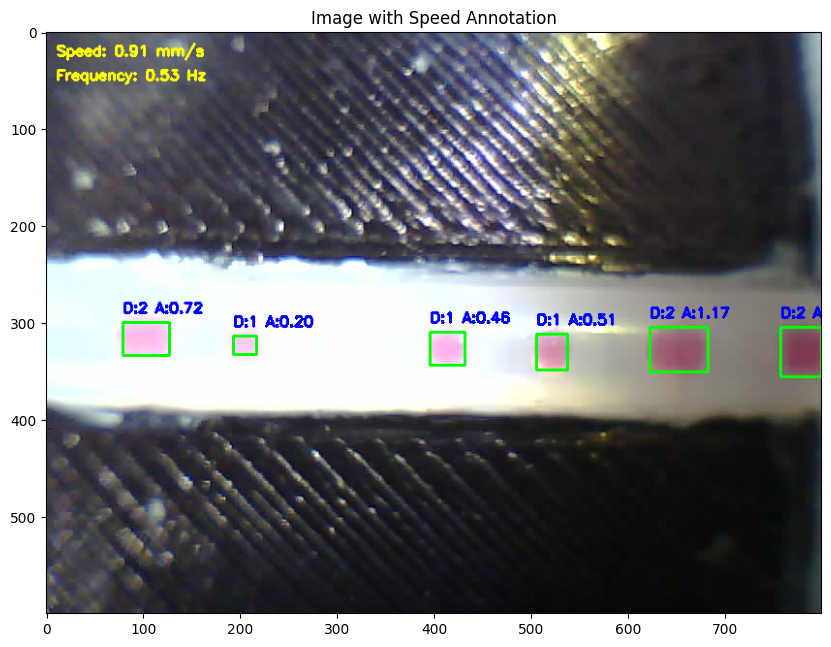

In [105]:
def getDistanceToLeftEdge(bboxes):

    bbox0 = bboxes[0]
    bbox1 = bboxes[1]

    dist_bbox0_to_left_edge = bbox0[0][0]
    dist_bbox1_to_left_edge = bbox1[0][0]

    return dist_bbox0_to_left_edge, dist_bbox1_to_left_edge

def getMedianDistanceBetweenDrops(file):

    bboxes, masks = Bbox().getBoundingBoxesForImg(cv2.imread(file),sdk=-2,minarea=250)

    distances_between_bboxes = []

    if len(bboxes) >= 2:

        for i in range(len(bboxes)-1):
            
            bbox0 = bboxes[i]
            bbox1 = bboxes[i+1]

            distance_between_boxes = -(bbox0[1][0] - bbox1[0][0])

            if distance_between_boxes >= 0:
                distances_between_bboxes.append(distance_between_boxes)

    median_distance = np.median(distances_between_bboxes) if distances_between_bboxes else 0
    median_distance_mm = median_distance * (1/44)  # Convert to mm

    return median_distance_mm

def getSpeedOfDrops(frame0,frame1):
    speed = 0

    # Obtener bounding boxes y máscaras
    bboxes_frame0, masks_frame0 = Bbox().getBoundingBoxesForImg(cv2.imread(frame0),sdk=-2,minarea=250) #list_files[index-1]
    bboxes_frame1, masks_frame1 = Bbox().getBoundingBoxesForImg(cv2.imread(frame1),sdk=-2,minarea=250) #list_files[index]
    if len(bboxes_frame0) and len(bboxes_frame1) > 2:
        # print("Bounding boxes found in frame 0:", len(bboxes_frame0))
        # print("Bounding boxes found in frame 1:", len(bboxes_frame1))
        
        dist_frame0_bbox0, dist_frame0_bbox1 = getDistanceToLeftEdge(bboxes_frame0)
        dist_frame1_bbox0, dist_frame1_bbox1 = getDistanceToLeftEdge(bboxes_frame1)

        # print(dist_frame0_bbox0, dist_frame0_bbox1)
        # print(dist_frame1_bbox0, dist_frame1_bbox1)
        variation = 0

        if dist_frame0_bbox0 == 0:
            if dist_frame1_bbox0 == 0:
                variation = dist_frame1_bbox1 - dist_frame0_bbox1
                #print(f"Caso 0: {variation}")
            else:
                variation = dist_frame1_bbox0 - dist_frame0_bbox1
                #print(f"Caso 1 {variation}")
        else:
            if dist_frame1_bbox0 == 0:
                variation = dist_frame1_bbox1 - dist_frame0_bbox1
                #print(f"Caso 2 {variation}")
            else:
                variation = dist_frame1_bbox0 - dist_frame0_bbox0
                #print(f"Caso 3 {variation}")

        if variation < 0:
            speed = -(1/44)*variation / 0.1 # mm / seg
    
    return speed

index = 170

speed = 0
frequency = 0
median_distance_mm = 0

speed = getSpeedOfDrops(list_files[index-1], list_files[index])
median_distance_mm = getMedianDistanceBetweenDrops(list_files[index])
frequency = speed / median_distance_mm if median_distance_mm > 0 else 0

text_speed = f"Speed: {speed:.2f} mm/s"
text_frequency = f"Frequency: {frequency:.2f} Hz"

rgb_img_copy, predictions = Bbox().getImgWithBboxesAndDrops(list_files[index],sdk=-2,minarea=250)

cv2.putText(rgb_img_copy, text_speed, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
cv2.putText(rgb_img_copy, text_frequency, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(rgb_img_copy)
plt.title("Image with Speed Annotation")
plt.show()


In [132]:
selected_list_files = list_files[::10]  # Select every 10th file
selected_list_filenames = list_filenames[::10]

In [133]:
list_df = []
for file, filename in zip(selected_list_files, selected_list_filenames):
    df = Bbox().getDataFrameForImg(file, filename, sdk=-2, minarea=250)
    list_df.append(df)

# Concatenate all dataframes into one
general_df = pd.concat(list_df, ignore_index=True)

# Save the dataframe to a CSV file
general_df.to_csv("../data/bboxes_payload.csv", index=False)

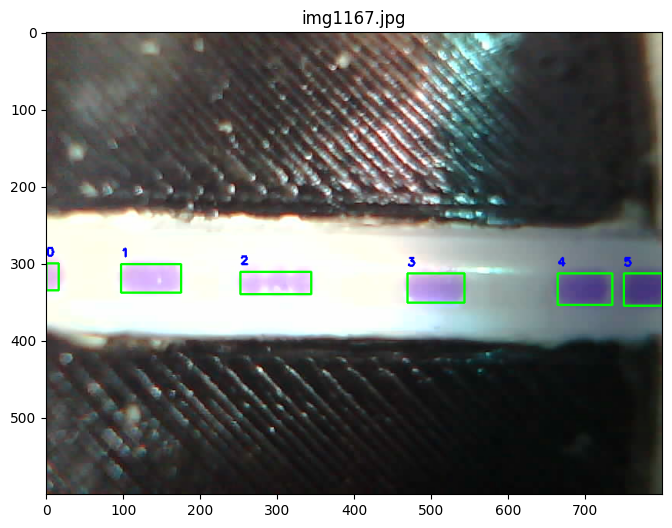

In [252]:
index = 10*115

test_img = cv2.imread(list_files[index]) # Imagen BGR
bboxes_frame0, masks_frame0 = Bbox().getBoundingBoxesForImg(test_img, sdk=-2, minarea=250)

rgb_img_copy = test_img.copy()

if len(bboxes_frame0) == 0:
    rgb_img_copy = test_img
else:
    for i, bbox in enumerate(bboxes_frame0):
        cv2.rectangle(rgb_img_copy, bbox[0], bbox[1], (0, 255, 0), 2)
        cv2.putText(rgb_img_copy, str(i), (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

figure, ax = plt.subplots(figsize=(12, 6))
plt.imshow(rgb_img_copy)
plt.title(f"{list_filenames[index]}")
plt.show()

In [254]:
def getDistanceToLeftEdge(bboxes):

    bbox0 = bboxes[0]
    bbox1 = bboxes[1]

    dist_bbox0_to_left_edge = bbox0[0][0]
    dist_bbox1_to_left_edge = bbox1[0][0]

    return dist_bbox0_to_left_edge, dist_bbox1_to_left_edge

def getMedianDistanceBetweenDrops(file):

    bboxes, masks = Bbox().getBoundingBoxesForImg(cv2.imread(file),sdk=-2,minarea=250)

    distances_between_bboxes = []

    if len(bboxes) >= 2:

        for i in range(len(bboxes)-1):
            
            bbox0 = bboxes[i]
            bbox1 = bboxes[i+1]

            distance_between_boxes = -(bbox0[1][0] - bbox1[0][0])

            if distance_between_boxes >= 0:
                distances_between_bboxes.append(distance_between_boxes)

    median_distance = np.median(distances_between_bboxes) if distances_between_bboxes else 0
    median_distance_mm = median_distance * (1/44)  # Convert to mm

    return median_distance_mm

def getSpeedOfDrops(frame0,frame1):
    speed = 0

    # Obtener bounding boxes y máscaras
    bboxes_frame0, masks_frame0 = Bbox().getBoundingBoxesForImg(cv2.imread(frame0),sdk=-2,minarea=250) #list_files[index-1]
    bboxes_frame1, masks_frame1 = Bbox().getBoundingBoxesForImg(cv2.imread(frame1),sdk=-2,minarea=250) #list_files[index]
    if len(bboxes_frame0) and len(bboxes_frame1) > 2:
        # print("Bounding boxes found in frame 0:", len(bboxes_frame0))
        # print("Bounding boxes found in frame 1:", len(bboxes_frame1))
        
        dist_frame0_bbox0, dist_frame0_bbox1 = getDistanceToLeftEdge(bboxes_frame0)
        dist_frame1_bbox0, dist_frame1_bbox1 = getDistanceToLeftEdge(bboxes_frame1)

        # print(dist_frame0_bbox0, dist_frame0_bbox1)
        # print(dist_frame1_bbox0, dist_frame1_bbox1)
        variation = 0

        if dist_frame0_bbox0 == 0:
            if dist_frame1_bbox0 == 0:
                variation = dist_frame1_bbox1 - dist_frame0_bbox1
                #print(f"Caso 0: {variation}")
            else:
                variation = dist_frame1_bbox0 - dist_frame0_bbox1
                #print(f"Caso 1 {variation}")
        else:
            if dist_frame1_bbox0 == 0:
                variation = dist_frame1_bbox1 - dist_frame0_bbox1
                #print(f"Caso 2 {variation}")
            else:
                variation = dist_frame1_bbox0 - dist_frame0_bbox0
                #print(f"Caso 3 {variation}")

        if variation < 0:
            speed = -(1/44)*variation / 0.1 # mm / seg
    
    return speed

selected_list_files = list_files[200:550]
selected_list_filenames = list_filenames[200:550]

list_img_with_bboxes_and_drops = []
for i,file in enumerate(selected_list_files):
    
    speed = 0
    frequency = 0
    median_distance_mm = 0

    if i > 0:
        speed = getSpeedOfDrops(selected_list_files[i-1], selected_list_files[i])
        median_distance_mm = getMedianDistanceBetweenDrops(file)
        frequency = speed / median_distance_mm if median_distance_mm > 0 else 0

    text_speed = f"Speed: {speed:.2f} mm/s"
    text_frequency = f"Frequency: {frequency:.2f} Hz"

    img_with_bbox_and_drops, predictions = Bbox().getImgWithBboxesAndDrops(path_img=file,sdk=-2,minarea=250)
    
    cv2.putText(img_with_bbox_and_drops, text_speed, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    cv2.putText(img_with_bbox_and_drops, text_frequency, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    
    list_img_with_bboxes_and_drops.append(img_with_bbox_and_drops)

# Configuración del video
output_path = "../videos/gotas04_bboxndrops_v02.mp4"  # Nombre del archivo de salida
fps = 10  # Cuadros por segundo (ajusta según necesites)
frame_size = (800, 600)  # Tamaño del video (ancho, alto). ¡Debe coincidir con tus imágenes!

# Inicializar VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Códec para MP4 (alternativa: 'XVID' para AVI)
video_writer = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

for frame in list_img_with_bboxes_and_drops:
    # Escribir el frame en el video
    video_writer.write(frame)

# Liberar recursos
video_writer.release()